# QuTiP example: Physical implementation of Cavity-Qubit model


Author: Anubhav Vardhan (anubhavvardhan@gmail.com)


For more information about QuTiP see [http://qutip.org](http://qutip.org)

In [1]:
%matplotlib inline

In [2]:
import numpy as np

In [3]:
from qutip import *

In [4]:
from qutip.qip.models.circuitprocessor import *

In [5]:
from qutip.qip.models.cqed import *

## Hamoltonian:

hamiltonian

The cavity-qubit model using a resonator as a bus can be implemented using the DispersivecQED class.

## Circuit Setup

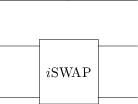

In [6]:
N = 3
qc = QubitCircuit(N)

qc.add_gate("ISWAP", targets=[0,1])

qc.png

In [7]:
U_ideal = gate_sequence_product(qc.propagators())

U_ideal

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = [8, 8], type = oper, isherm = False
Qobj data =
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+1.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+1.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+1.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+1.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j]]

## Dispersive cQED Model Implementation:

In [8]:
p1 = DispersivecQED(N, correct_global_phase=True)

U_list = p1.run(qc)

U_physical = gate_sequence_product(U_list)

U_physical.tidyup(atol=1e-3)

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = [8, 8], type = oper, isherm = False
Qobj data =
[[ 1.00000000+0.j         0.00000000+0.j         0.00000000+0.j
   0.00000000+0.j         0.00000000+0.j         0.00000000+0.j
   0.00000000+0.j         0.00000000+0.j       ]
 [ 0.00000000+0.j         1.00000000+0.j         0.00000000+0.j
   0.00000000+0.j         0.00000000+0.j         0.00000000+0.j
   0.00000000+0.j         0.00000000+0.j       ]
 [ 0.00000000+0.j         0.00000000+0.j         0.00000000+0.j
   0.00000000+0.j         0.00000000+0.9999999j  0.00000000+0.j
   0.00000000+0.j         0.00000000+0.j       ]
 [ 0.00000000+0.j         0.00000000+0.j         0.00000000+0.j
   0.00000000+0.j         0.00000000+0.j         0.00000000+0.9999999j
   0.00000000+0.j         0.00000000+0.j       ]
 [ 0.00000000+0.j         0.00000000+0.j         0.00000000+0.9999999j
   0.00000000+0.j         0.00000000+0.j         0.00000000+0.j
   0.00000000+0.j         0.00000000+0.j       

In [9]:
(U_ideal - U_physical).norm()

4.7506632105953628e-07

The results obtained from the physical implementation agree with the ideal result.

In [10]:
p1.qc0.gates

[Gate(ISWAP, targets=[0, 1], controls=None)]

The gates are first transformed into the ISWAP basis, which is redundant in this example.

In [11]:
p1.qc1.gates

[Gate(ISWAP, targets=[0, 1], controls=None)]

An RZ gate, followed by a Globalphase, is applied to all ISWAP and SQRTISWAP gates to normalize the propagator matrix.
Arg_value for the ISWAP case is pi/2, while for the SQRTISWAP case, it is pi/4.

In [12]:
p1.qc2.gates

[Gate(ISWAP, targets=[0, 1], controls=None),
 Gate(RZ, targets=[0], controls=None),
 Gate(RZ, targets=[1], controls=None),
 Gate(GLOBALPHASE, targets=None, controls=None)]

The time for each applied gate:

In [13]:
p1.T_list

[2500.0000000000027, 0.013157894736842106, 0.013157894736842106]

The pulse can be plotted as:

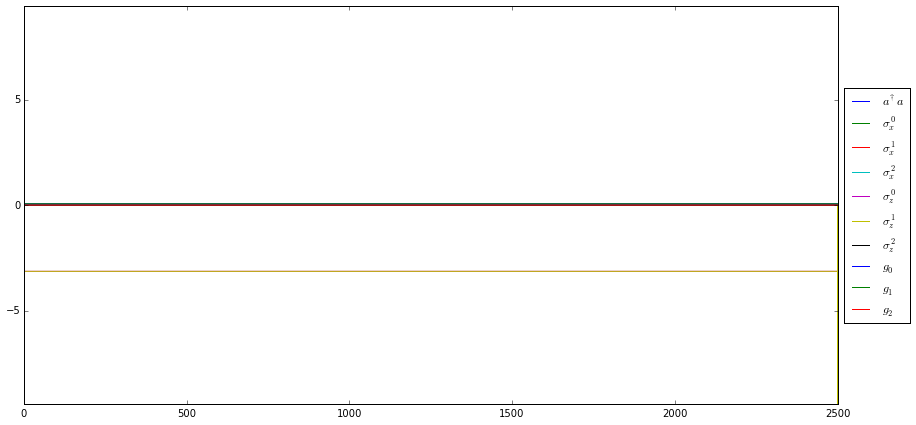

In [14]:
p1.plot_pulses();

### Software versions:

In [15]:
from qutip.ipynbtools import version_table
version_table()